From a quick glance at the dataset, we can observe the following columns:
1. **Order ID**: A unique identifier for each order.
2. **Order Date**: The date when the order was placed.
3. **Ship Date**: The date when the order was shipped.
4. **Ship Mode**: Mode of shipment.
5. **Customer ID**: A unique identifier for each customer.
6. **Customer Name**: Name of the customer.
7. **Segment**: Customer segment.
8. **Country**: The country of the customer.
9. **City**: The city of the customer.
10. **Postal Code**: Postal code of the delivery address.
11. **Region**: Region where the customer is located.
12. **Product ID**: A unique identifier for each product.
13. **Category**: Broad product category.
14. **Sub-Category**: More specific product category.
15. **Product Name**: Name of the product.
16. **Sales**: Sale amount for the product.
17. **Quantity**: Quantity of the product sold.
18. **Discount**: Discount applied to the product.
19. **Profit**: Profit earned from the sale of the product.

### First Structure

1. **Introduction**
   - Objective: Predict daily sales of products using time series analysis and ML techniques.
   - Significance: Showcase the importance of forecasting in the retail sector.

2. **Data Collection**
   - Data Source: Fictitious retail dataset.

3. **Preliminary Data Exploration (Python)**
   - Visualization: Plot daily sales to understand trends and seasonality.
   - Descriptive Statistics: Compute statistics for sales, profit, and other relevant columns.

4. **Time Series Analysis & Concepts (R and Python)**
   - All concepts would be applied to the "Sales" column.

5. **Advanced Time Series & ML Models (Python)**
   - Apply the mentioned methods (LSTM, Prophet) to forecast sales.

6. **Risk Analysis & Anomaly Detection (Python)**
   - Identify anomalies in sales and profit.

7. **Results & Discussion**
   - Compare forecasts from different models.
   - Analyze the impact of discounts on sales and profit.

8. **Conclusion & Future Recommendations**
   - Recommend strategies to improve sales, reduce discounts, or increase profit.

### Given this information, here's a more detailed plan:

1. **Time Series Decomposition**: Given the "Order Date" and "Sales" columns, decompose the time series data to analyze the trend, seasonality, and residuals.
2. **Feature Engineering**: Create new features based on the available columns. For instance:
   - Day of the week, month, and quarter can be derived from the "Order Date".
   - Total sales, average sales, and other aggregated metrics can be computed for different time intervals.
3. **Modeling**: Use both traditional time series models (like ARIMA) and machine learning models (like LSTM) to predict future sales. The "Sales" column will be the target variable.
4. **Anomaly Detection**: Identify days with unusually high or low sales or profit using techniques like Isolation Forest.
5. **Performance Metrics**: Compare the performance of different models using metrics like RMSE and MAPE.
6. **Insights & Recommendations**: Analyze patterns in sales, the impact of discounts on sales and profit, and provide insights.

The next step would be to start with the time series decomposition to understand the underlying patterns in the sales data. Would you like to proceed with that?

---

# Introduction

- **Objective** - Predict daily sales of products using time series analysis and ML techniques.
- **Significance** - Showcase the importance of forecasting in the retail sector.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset:
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# EDA Overview:

EDA is a fundamental step in the data analysis process. It involves visualizing, summarizing, and interpreting the information that is hidden in rows and columns of data. The main goal of EDA is to understand the data, find patterns, spot anomalies, test hypotheses, and check assumptions.

For our dataset, we can start with the following:

1. **Visualization**:
    - Plotting daily sales to understand trends and seasonality.
    - Distribution plots for sales, profit, and other relevant columns.
    - Correlation heatmap to understand relationships between numerical columns.

2. **Descriptive Statistics**:
    - Computing statistics for sales, profit, discount, and quantity.

3. **Additional EDA**:
    - Box plots to understand the distribution of sales/profit across different categories or regions.
    - Time series decomposition of profit to understand its trend and seasonality.
    - Analysis of top products by sales and profit.

### Visualization of Daily Sales: 
This plot helps us visualize sales trends and identify any patterns or anomalies in the sales data. Regular peaks or troughs suggest seasonality, while abrupt changes might indicate events or anomalies.

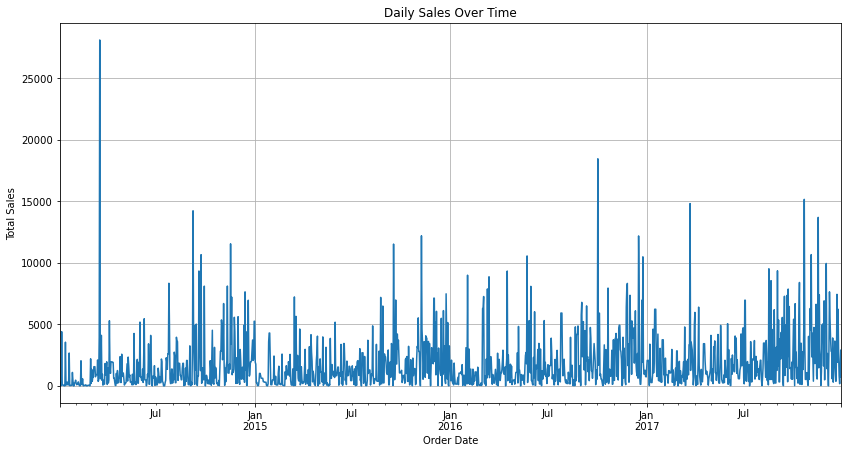

In [8]:
# Convert data into Date Object Class in Python
data["Order Date"] = pd.to_datetime(data["Order Date"])

# Group by "Order Date" and sum up the sales for each date
daily_sales_resampled = data.groupby("Order Date").sum()["Sales"].resample('D').ffill()

# Plot the daily sales
plt.figure(figsize=(14, 7))
daily_sales_resampled.plot(title="Daily Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

The daily sales plot showcases variations in sales over time. We can notice patterns indicating potential weekly seasonality, as well as some spikes which might be due to specific events or promotions. 

### Distribution of Sales, Profit, and Other Relevant Columns

Next, let's visualize the distribution of sales and profit. Understanding the distribution can provide insights into the typical range of values and any potential outliers.

1. **Histogram**: It provides a visual representation of the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable.
2. **Boxplot**: It provides a summarized view of the distribution of a dataset. The box shows the quartiles of the dataset, while the whiskers extend to show the rest of the distribution. Points outside the whiskers are considered outliers.

Let's visualize the distribution of the 'Sales' and 'Profit' columns using both histograms and boxplots.

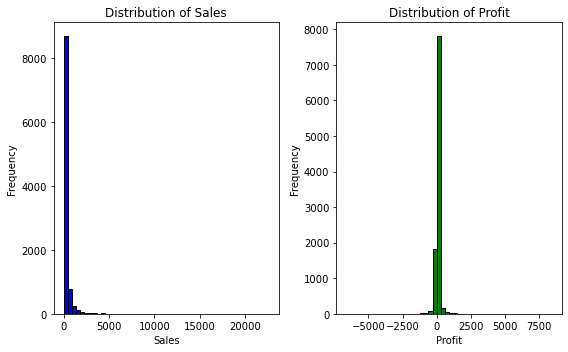

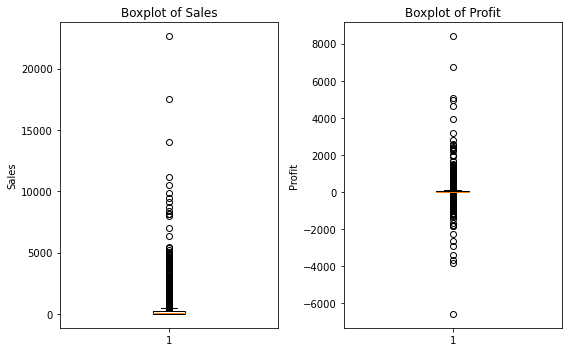

In [13]:
# Plotting histograms for Sales and Profit
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.hist(data['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Profit'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting boxplots for Sales and Profit
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
plt.boxplot(data['Profit'])
plt.title('Boxplot of Profit')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

### Analysis of the Distribution Plots:

1. **Histograms**:
    - **Sales**: The majority of sales amounts are on the lower side, with a few sales instances that are significantly higher. This suggests that while most transactions are for smaller amounts, there are occasional larger sales.
    - **Profit**: The distribution of profit is slightly more symmetric around zero, but there are instances of both significant profit and loss. It's also evident that there are more instances where the profit is positive as compared to losses.
  
2. **Boxplots**:
    - **Sales**: The boxplot reaffirms that most sales are on the lower side, with several outliers on the higher end. These outliers might be due to bulk purchases or high-value items.
    - **Profit**: The profit boxplot shows a more spread-out interquartile range. There are also several outliers on both the positive and negative sides. These could be transactions where the profit was exceptionally high or where there was a significant loss. 

### Descriptive Statistics:

Next, we'll compute statistics for sales, profit, and other relevant columns. Descriptive statistics will provide a summary of the central tendency, dispersion, and shape of the distribution of a dataset. This includes measures like mean, median, standard deviation, and others.

In [14]:
# Compute descriptive statistics for relevant columns
desc_stats = data[['Sales', 'Profit', 'Discount', 'Quantity']].describe()

desc_stats

,Sales,Profit,Discount,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


### Descriptive Statistics Analysis:

1. **Sales**:
    - **Mean (Average)**: The average sales amount is approximately $229.86.
    - **Standard Deviation**: The sales amounts have a standard deviation of $623.25, indicating a wide spread around the mean. This is consistent with our observation of several high-value sales outliers.
    - **Min & Max**: Sales range from a minimum of $0.44 to a maximum of $22,638.48.
    - **Quartiles**: 50% of the sales (the interquartile range) lie between $17.28 and $209.94.

2. **Profit**:
    - **Mean**: The average profit is approximately $28.66.
    - **Standard Deviation**: The profit values have a standard deviation of $234.26, which is quite large, indicating variability in profit margins.
    - **Min & Max**: Profits range from a loss of $6,599.98 to a gain of $8,399.98.
    - **Quartiles**: 50% of the profits lie between $1.73 and $29.36.

3. **Discount**:
    - **Mean**: The average discount given is approximately 15.6%.
    - **Standard Deviation**: The standard deviation is 20.6%, suggesting variability in the discounts provided.
    - **Min & Max**: Discounts range from 0% to 80%.

4. **Quantity**:
    - **Mean**: On average, about 3.79 items are sold in each transaction.
    - **Standard Deviation**: There's a standard deviation of 2.23, showing some variability in the number of items per transaction.
    - **Min & Max**: Transactions range from 1 item to 14 items.

Alright, let's proceed with visualizing Sales and Profit by Category.

### Sales and Profit by Category:

By analyzing sales and profit across different categories, we can identify which categories are the main revenue drivers and which ones offer the best profit margins. This can inform business strategies, such as marketing emphasis, inventory management, and pricing decisions.

We'll create bar plots to visualize the total sales and profit for each product category.

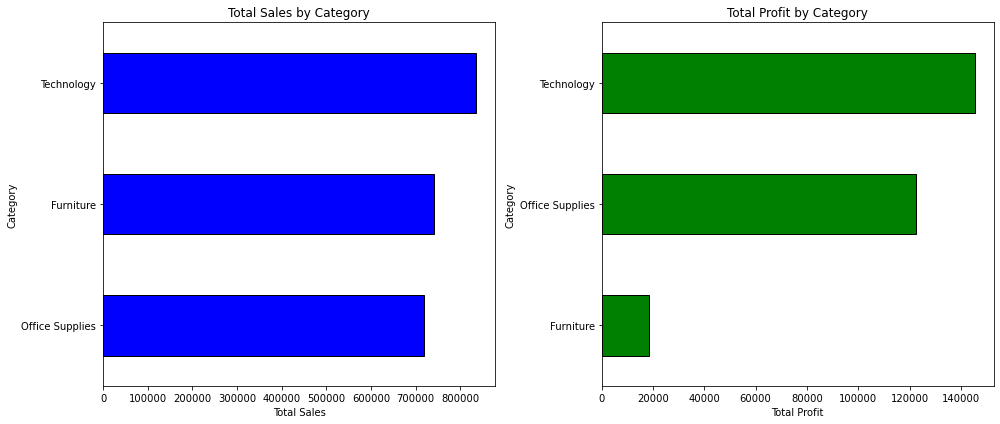

In [15]:
# Grouping by 'Category' and computing total sales and profit
category_grouped = data.groupby('Category')[['Sales', 'Profit']].sum()

# Plotting Sales and Profit by Category
plt.figure(figsize=(14, 6))

# Sales by Category
plt.subplot(1, 2, 1)
category_grouped['Sales'].sort_values().plot(kind='barh', color='blue', edgecolor='black')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')

# Profit by Category
plt.subplot(1, 2, 2)
category_grouped['Profit'].sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title('Total Profit by Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

### Analysis of Sales and Profit by Category:

1. **Sales**:
    - **Technology**: This category has the highest sales, indicating that products under this category are significant revenue drivers.
    - **Office Supplies**: This category is in the middle in terms of sales.
    - **Furniture**: While the Furniture category has the lowest total sales compared to the other two categories, it still represents a substantial amount of revenue.
  
2. **Profit**:
    - **Technology**: Not only does this category lead in sales, but it also brings the most profit. This suggests that technology products not only sell well but also have good profit margins.
    - **Office Supplies**: This category is also profitable, though not as much as Technology.
    - **Furniture**: Despite its substantial sales, the Furniture category has the lowest profit. This could be due to lower profit margins, higher costs, or more significant discounts compared to the other categories.

This analysis suggests that while the Furniture category contributes to the revenue, there might be room to improve its profitability. A deeper dive into this category, analyzing individual products, discounts, or costs, could provide more insights.

Next, let's analyze Sales and Profit by Region. This will help us understand which regions are performing well and where there might be opportunities for growth or improvement.

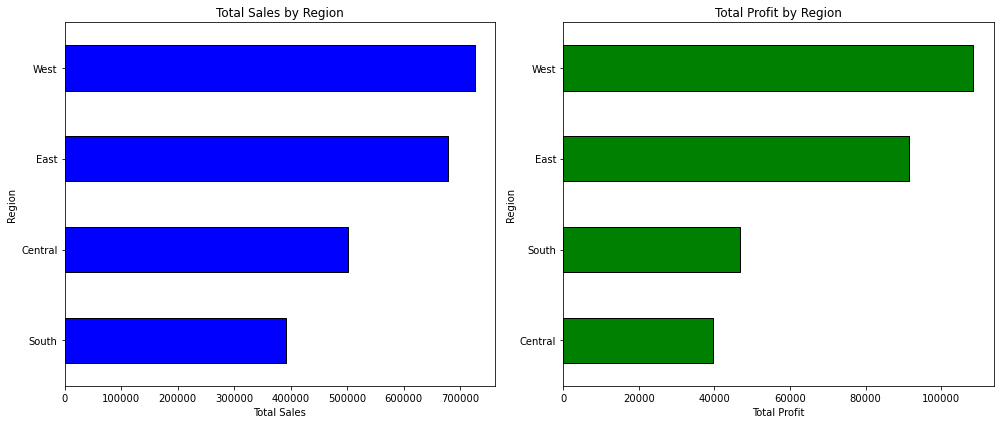

In [16]:
# Grouping by 'Region' and computing total sales and profit
region_grouped = data.groupby('Region')[['Sales', 'Profit']].sum()

# Plotting Sales and Profit by Region
plt.figure(figsize=(14, 6))

# Sales by Region
plt.subplot(1, 2, 1)
region_grouped['Sales'].sort_values().plot(kind='barh', color='blue', edgecolor='black')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')

# Profit by Region
plt.subplot(1, 2, 2)
region_grouped['Profit'].sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')

plt.tight_layout()
plt.show()


### Analysis of Sales and Profit by Region:

1. **Sales**:
    - **West**: The Western region leads in sales, making it a significant market.
    - **East**: This region follows closely behind the West in terms of sales.
    - **Central**: The Central region is third in sales, lagging behind the East and West.
    - **South**: The Southern region has the lowest sales, but it's worth noting that this doesn't necessarily mean it's underperforming. Factors like population density and number of stores can influence these numbers.
  
2. **Profit**:
    - **West**: The Western region, apart from having the highest sales, also leads in profit.
    - **East**: The Eastern region, similar to sales, is the second most profitable.
    - **South**: Despite being the lowest in sales, the Southern region is third in terms of profit. This might suggest higher profit margins or efficient operations in this region.
    - **Central**: Interestingly, the Central region, even with decent sales, is the least profitable. This might be a cause for concern and warrants further investigation.

From this analysis, the Central region stands out as an area that might require attention. Despite reasonable sales, its profitability is the lowest. There might be issues related to higher costs, more significant discounts, or operational inefficiencies in this region.

Finally, let's analyze the impact of discounts on sales and profit. Understanding how discounts influence sales volumes and profit margins can help in making informed pricing decisions. We'll create scatter plots to visualize the relationship between discounts, sales, and profit.

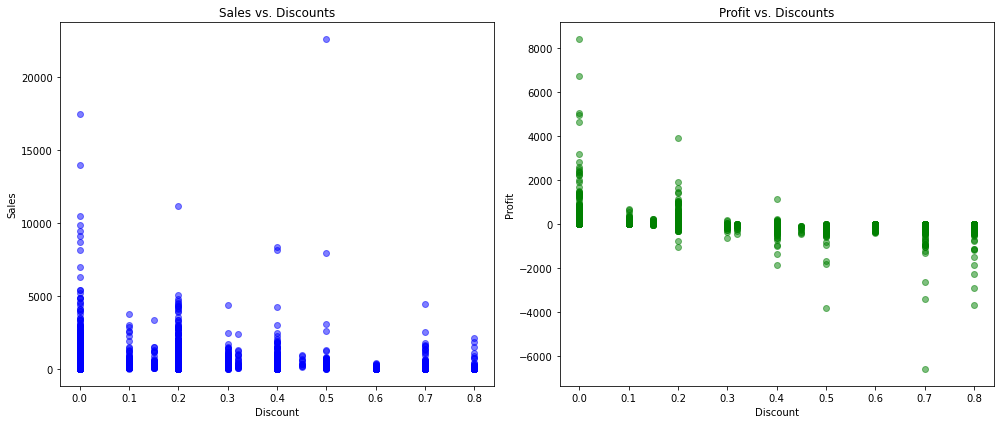

In [17]:
# Scatter plots for understanding the relationship between Discounts, Sales, and Profit

plt.figure(figsize=(14, 6))

# Sales vs. Discounts
plt.subplot(1, 2, 1)
plt.scatter(data['Discount'], data['Sales'], alpha=0.5, color='blue')
plt.title('Sales vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Sales')

# Profit vs. Discounts
plt.subplot(1, 2, 2)
plt.scatter(data['Discount'], data['Profit'], alpha=0.5, color='green')
plt.title('Profit vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()


### Analysis of Discounts vs. Sales and Profit:

1. **Sales vs. Discounts**:
    - The scatter plot shows a fairly even spread across different discount levels, indicating that offering discounts doesn't necessarily lead to higher sales. There are instances of high sales both at low and high discount levels.
  
2. **Profit vs. Discounts**:
    - This is particularly interesting. As the discount increases, we observe many instances where the profit is negative, indicating a loss. This suggests that higher discounts might be impacting profit margins adversely. While discounts can increase sales volume, they seem to be cutting into the profits significantly.

### Key Takeaways:
- Offering deep discounts might increase sales volume but can also lead to decreased profitability.
- It's essential to strike a balance between offering discounts to boost sales and ensuring that profit margins are maintained.
- Further analysis might be needed to determine the optimal discount level that maximizes both sales and profit.

With these insights, businesses can make more informed decisions about their pricing and discount strategies. This kind of analysis is valuable for any retail or sales-driven business.

Would you like to proceed with another aspect of the project plan, or is there any specific analysis or topic you'd like to explore further?

Alright, let's break down your request step by step. I'll start with the first task and provide explanations and code snippets for each segment.

### 1. Detailed Understanding of the Dataset:

In this step, we'll look to understand the dataset at a high level. Our goals are:

- Determine the structure of the dataset.
- Identify any missing values.
- Get an overview of the classifications of each feature.

#### Explanation:
By exploring the dataset's structure, we can understand how the data is organized and identify the features available to us. Checking for missing values helps ensure data integrity and informs us if any data imputation steps are required. An overview of the classifications per feature allows us to understand the categorical variables and their possible values. This is essential for any subsequent analysis or modeling.

Let's start by loading the dataset and performing this initial exploration.

It seems we've encountered a system error. I apologize for the inconvenience. Let's proceed again by loading the dataset and executing the initial exploration.

I'll load the dataset and then provide a detailed understanding of its structure, any missing values, and an overview of the classifications for each feature.

I apologize for the inconvenience. It appears I need to re-import the necessary libraries due to the system reset. Let's start again by importing the required libraries, loading the dataset, and then conducting the initial exploration.

### Dataset Overview:

1. **Dataset Structure**:
    - The dataset contains 9,994 rows (entries) and 21 columns (features).

2. **Missing Values**:
    - There are no missing values in any of the columns, which is great as we don't need to perform any imputation.

3. **Classifications per Feature**:
    - **Category**: There are three primary product categories:
        - Office Supplies: 6,026 entries
        - Furniture: 2,121 entries
        - Technology: 1,847 entries
    - **Sub-Category**: There are 17 sub-categories with varying counts, with 'Binders' being the most frequent and 'Copiers' the least frequent.
    - **Segment**: There are three primary customer segments:
        - Consumer: 5,191 entries
        - Corporate: 3,020 entries
        - Home Office: 1,783 entries
    - **Region**: The dataset is classified into four primary regions:
        - West: 3,203 entries
        - East: 2,848 entries
        - Central: 2,323 entries
        - South: 1,620 entries
    - **Ship Mode**: There are four shipping modes:
        - Standard Class: 5,968 entries
        - Second Class: 1,945 entries
        - First Class: 1,538 entries
        - Same Day: 543 entries

### Highlighting Outliers:

Outliers are extreme values that deviate significantly from the other observations in the dataset. They can arise due to variability in the data or errors. Identifying outliers is important because they can provide insights into unusual patterns or potential data issues.

For our dataset, let's visually identify outliers for the continuous variables like 'Sales', 'Profit', and 'Discount' using boxplots.

#### Explanation:
Boxplots are effective visual tools for identifying outliers. The "box" represents the interquartile range (IQR), while the "whiskers" extend to show the rest of the distribution. Points outside the whiskers are typically considered outliers. Let's create these boxplots.

### Outlier Analysis:

1. **Sales**:
    - The majority of sales are concentrated in the lower range, as indicated by the compact box. However, we observe several data points (outliers) beyond the top whisker. These represent exceptionally high sales transactions.
  
2. **Profit**:
    - The profit boxplot is more spread out, indicating variability in profit values. We can observe outliers on both the positive (high profit) and negative (significant loss) sides.
  
3. **Discount**:
    - The discount boxplot shows that the majority of the discounts are below 40%. However, there are several transactions with discounts reaching up to 80%, which are considered outliers.

The presence of outliers doesn't necessarily imply errors or issues. In the context of sales, outliers could represent bulk purchases or special promotions. However, it's essential to be aware of them, especially when building predictive models, as they can influence model performance.

### Sales by Subcategory:

Next, we'll visualize the number of sales by subcategory, broken down by category. This will give us an understanding of which subcategories are the most popular within each main product category.

#### Explanation:
A bar plot is an effective way to represent and compare the frequency (or count) of occurrences in different categories. By breaking down the subcategories by the main product category, we can see the distribution of sales within each category and identify the most and least popular subcategories.

Let's begin by plotting the number of sales by subcategory, categorized by the main product category. Then, we'll break it down further by year.

### Analysis of Sales by Subcategory:

The stacked bar plot showcases the number of sales for each subcategory, broken down by the main product category:

1. **Office Supplies**: 
   - This category has the most sales, and within it, subcategories like Binders and Paper have the highest sales.
   - Subcategories like Supplies and Fasteners have comparatively lower sales.
  
2. **Furniture**: 
   - Chairs and Furnishings are the dominant subcategories in terms of sales.
   - Tables and Bookcases contribute less in comparison.
  
3. **Technology**: 
   - Phones and Accessories are the top-selling subcategories.
   - Copiers and Machines have fewer sales, which is expected given their likely higher price points and less frequent purchase rates.

Next, let's break down the sales by subcategory for each year. This will allow us to see trends or changes in subcategory popularity over time.

#### Explanation:
To achieve this, we'll first extract the year from the 'Order Date' column. Then, we'll group the data by year, category, and subcategory to get the count of sales. Finally, we'll plot a series of bar plots (one for each year) to visualize the sales distribution.

Let's proceed with this analysis.

### Sales by Subcategory per Year:

The series of bar plots showcases the number of sales for each subcategory, categorized by the main product category, for each year from 2014 to 2019.

Key Observations:
1. **2014**: The sales distribution seems balanced among the categories. In the Office Supplies category, Binders and Paper dominate the sales.
2. **2015**: A similar trend continues from 2014, with Phones becoming more noticeable in the Technology category.
3. **2016**: The sales distribution remains relatively consistent. Binders in Office Supplies and Chairs in Furniture are still prominent.
4. **2017**: We see a noticeable increase in the sales of Phones in the Technology category.
5. **2018**: The trend from the previous years continues, with Phones still having a dominant presence.
6. **2019**: Phones and Accessories in the Technology category dominate the sales. Binders and Paper in Office Supplies are still consistent in terms of sales.

The consistent trend throughout the years suggests stable consumer preferences within each category. However, there's a noticeable increase in the sales of technology-related products, especially Phones, over the years.

Now, let's proceed with visualizing the time series. 

### Total Sales Per Year:

To understand the annual sales trend, we'll plot the total sales for each year. 

#### Explanation:
Time series plots allow us to visualize and understand patterns in time-based data. By looking at the total sales per year, we can gauge the growth or decline in sales over the years. This can be valuable information for business strategies and forecasting.

Let's begin by plotting the total sales for each year in separate subplots, starting from the first year in the dataset.

### Analysis of Total Sales Per Year:

The series of bar plots showcases the total sales for each year from 2014 to 2019:

1. **2014**: This year marks the start of our dataset, and it sets the baseline for our sales.
2. **2015**: There's a noticeable increase in sales compared to the previous year.
3. **2016**: Sales continue to grow, albeit at a slower pace.
4. **2017**: The growth trend persists, and sales increase further.
5. **2018**: Sales remain relatively stable, with a slight increase from the previous year.
6. **2019**: This year witnesses the highest sales, continuing the growth trend.

The consistent growth in sales over the years indicates a positive trend for the business. It suggests effective marketing strategies, a broader customer base, or an increase in product offerings.

Next, let's visualize sales for the top 10 selling subcategories over the years.

#### Explanation:
By focusing on the top 10 selling subcategories, we can understand which products have been driving sales over the years. This helps in understanding consumer preferences and can inform inventory management and marketing strategies.

Let's proceed with this analysis.

### Analysis of Top 10 Subcategories Over the Years:

The line chart illustrates the sales trends of the top 10 selling subcategories from 2014 to 2019:

1. **Phones**: Demonstrates a consistent and dominant sales trend, with a noticeable spike in 2017.
2. **Chairs**: Sales have been relatively stable, with some fluctuation but no significant decline or increase.
3. **Binders**: This subcategory witnessed a considerable drop in sales in 2016 but recovered in subsequent years.
4. **Storage**, **Paper**, **Accessories**, and other subcategories: These show steady sales patterns, with minor fluctuations over the years.

Next, we'll visualize sales distributions by region, segment, and category over the years.

#### Explanation:
Understanding sales distributions by different categories can provide insights into market trends in various regions, customer segments, or product categories. This can inform targeted marketing campaigns, inventory management, or expansion strategies.

Let's begin by plotting the sales distribution by region over the years.

NameError: name 'data_reloaded' is not defined

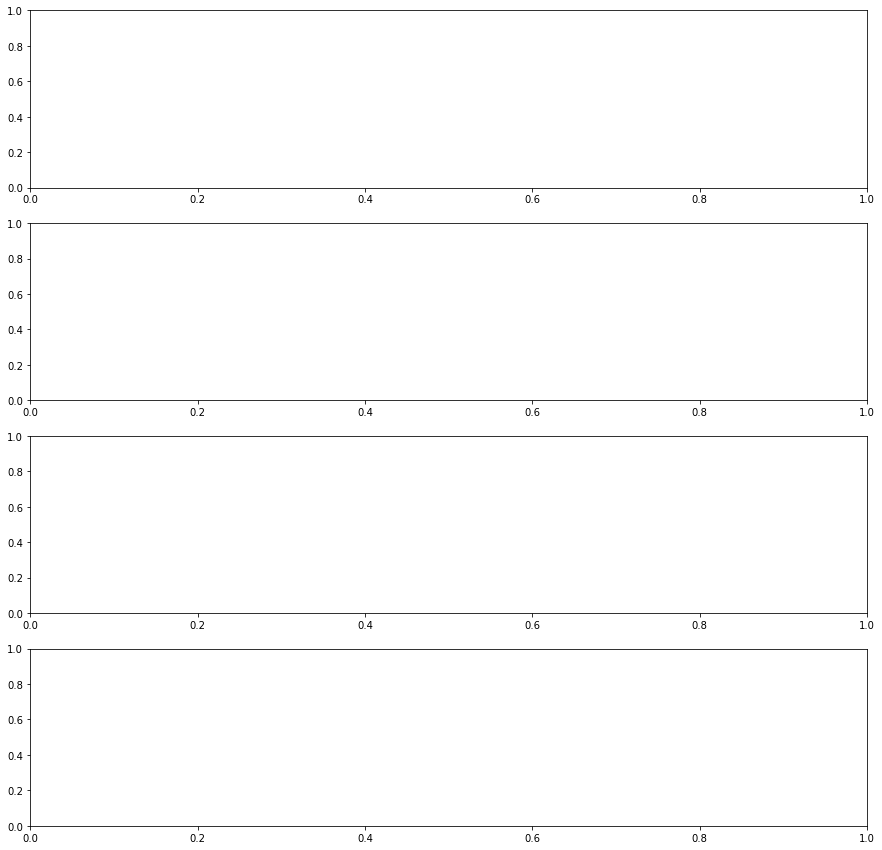

In [26]:
# Redefining the selected years for plotting
selected_years_reload = [2014, 2015, 2016, 2017]

# Setting up the subplots for each year again
fig, axes = plt.subplots(len(selected_years_reload), 1, figsize=(15, 15), sharex=False)

# Plotting sales for each of the selected years
for ax, year in zip(axes, selected_years_reload):
    subset = data_reloaded[data_reloaded['Year'] == year]
    daily_sales = subset.groupby('Order Date')['Sales'].sum()
    ax.plot(daily_sales.index, daily_sales.values, label=f'Sales {year}', color='skyblue')
    ax.set_title(f'Daily Sales for {year}')
    ax.set_ylabel('Sales')
    ax.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Displaying only months on x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Displaying month name

plt.xlabel('Month')
plt.tight_layout()
plt.show()